<a href="https://colab.research.google.com/github/brendanpshea/programming_problem_solving/blob/main/Java_08_InheritancePolymorphism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inheritance and Polymorphism: Superheroes Need Workouts Too
## Brendan Shea, PhD

Imagine you have been hired to design a fitness app for superheroes. Your clients include **He-Man**, **She-Ra**, and the **Incredible Hulk**. They want an app that gives them exercises, tracks calories, and adapts to their unique styles of training. At first, you might think about writing a separate program for each hero—but this would be messy and repetitive. Instead, we can design the program so that it shares common features but also allows each hero to have their own special behavior.

This is where **inheritance** and related tools in Java come in. These features let us write code once in a general way and then extend or specialize it for particular cases. In this chapter, you will learn:

* **Inheritance**: creating a new class from an existing class.
* **Polymorphism**: writing code that can work with many different types in a unified way.
* **Interfaces**: contracts that classes can agree to follow.
* **Abstract classes**: blueprints for classes that are partially finished.
* **Static and final**: special keywords for constants and class-level features.

Think of this chapter as building the “superhero workout framework.” First we’ll design a general model for an **Exercise**, then we’ll customize it for different heroes. By the end, you’ll see how these ideas let you write code that is flexible, powerful, and (hopefully) fun.

To get started, here’s a very simple **Java class definition** you should recall from earlier chapters:


In [1]:
%%writefile Exercise.java
public class Exercise {
    private String name;

    public Exercise(String name) {
        this.name = name;
    }

    public void perform() {
        System.out.println("Performing " + name);
    }
}

Writing Exercise.java



* The keyword **class** defines a new type.
* The keyword **public** makes the class accessible to other parts of the program.
* The **constructor** (`public Exercise(String name)`) sets up the object when created.
* The **method** `perform()` carries out an action.

This simple design will serve as the foundation. Next, we’ll see how to extend it so Hulk can smash burpees while She-Ra does squats—all without writing everything from scratch.


## Brendan's Lecture

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('e5lM9Z36HIA', width=800, height=500)

## Inheritance: Extending a Parent Class

One of the most powerful ideas in object-oriented programming is **inheritance**, which means creating a new class based on an existing one. The new class, called a **subclass**, automatically gains the variables and methods of the **parent class** (also called the **superclass**). You can then add new features or change existing ones.

In Java, inheritance uses the keyword **extends**. This tells the compiler that one class is derived from another.

Here’s an example. Suppose we want a specific kind of exercise—say, push-ups:


In [2]:
%%writefile PushUp.java
public class PushUp extends Exercise {
    public PushUp() {
        super("Push-Up");
    }
}

Writing PushUp.java


Let’s break this down:

* The keyword **extends** means `PushUp` is a subclass of `Exercise`.
* The **constructor** in `PushUp` calls the constructor of `Exercise` using **super**.
* `super("Push-Up")` passes the string `"Push-Up"` to the parent class so it can store the exercise name.

This means that even though we only wrote a few lines, `PushUp` already knows how to use the `perform()` method from `Exercise`, because it **inherits** it.

If we run this small test:

In [3]:
%%writefile TestWorkout.java
public class TestWorkout {
    public static void main(String[] args) {
        PushUp p = new PushUp();
        p.perform();
    }
}

Writing TestWorkout.java


In [4]:
!javac PushUp.java Exercise.java TestWorkout.java
!java TestWorkout

Performing Push-Up


We can see that that client is "Performing Pushup".

### A Visual Model of Inheritance

You can imagine inheritance as an arrow pointing from child to parent:

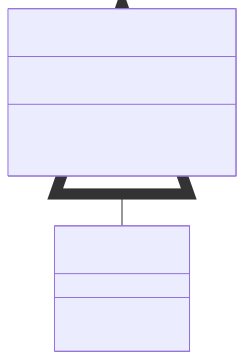

In [ ]:
# @title
import base64
import requests
from IPython.display import SVG, display

def mm(graph: str) -> None:
    """
    Fetch and display a Mermaid diagram as SVG.

    Parameters:
      graph (str): Mermaid graph definition.
    """
    # 1. Encode the graph to Base64
    b64 = base64.urlsafe_b64encode(graph.encode('utf-8')).decode('ascii')
    # 2. Construct the SVG URL
    url = f'https://mermaid.ink/svg/{b64}'
    # 3. Fetch SVG content
    svg_data = requests.get(url).text
    # 4. Render inline in Jupyter
    display(SVG(data=svg_data))

# Change the code in the """
mm("""
classDiagram
    Exercise <|-- PushUp
    class Exercise {
        - String name
        + Exercise(String name)
        + perform()
    }
    class PushUp {
        + PushUp()
    }""")

Here, `PushUp` **inherits** the variables and methods from `Exercise`. Later, we’ll see how it can also **override** them to provide new behavior.

## Constructors and super

When we create a subclass, we often need to make sure that the **parent class constructor** runs first. This ensures that the parent part of the object is set up correctly before the child adds its own details. In Java, we do this with the keyword **super**.

A **constructor** is a special method that runs when a new object is created. It usually sets up variables or prepares the object for use. In inheritance, the child class can call the parent’s constructor with `super(...)`.

Let’s add another exercise type—squats—that also needs a name:

In [7]:
%%writefile Squat.java
public class Squat extends Exercise {
    private int reps;

    public Squat(int reps) {
        super("Squat");      // Call parent constructor
        this.reps = reps;    // Child adds its own detail
    }

    public void perform() {
        System.out.println("Doing " + reps + " squats!");
    }
}

Writing Squat.java


### Explanation

* `super("Squat")` calls the `Exercise` constructor, setting the name field.
* `this.reps = reps;` is new information that belongs only to squats.
* The `perform()` method is rewritten (this is called **overriding**) to display the reps.

Now we can test it:


In [9]:
%%writefile TestWorkout.java
public class TestWorkout {
    public static void main(String[] args) {
        Squat s = new Squat(15);
        s.perform();
    }
}

Overwriting TestWorkout.java


In [13]:
!javac Exercise.java Squat.java TestWorkout.java
!java TestWorkout

Doing 15 squats!


### Why super Matters

Without `super`, the parent class wouldn’t be initialized properly, and we’d risk errors or missing data. Think of it like superheroes inheriting powers from their parents: He-Man might start with “super strength” from his lineage, and then add his own sword skills on top. You need both the inherited powers and the new ones.



## Exercise 1: Extending the Workout

It’s your turn to try inheritance. Below is some starter code for the base `Exercise` class and a simple subclass. Your job is to create your own exercise for our superhero clients.

In [ ]:
%%writefile Exercise.java
public class Exercise {
    private String name;

    public Exercise(String name) {
        this.name = name;
    }

    public void perform() {
        System.out.println("Performing " + name);
    }
}

Overwriting Exercise.java


And here is a sample subclass:

In [ ]:
%%writefile PushUp.java
public class PushUp extends Exercise {
    public PushUp() {
        super("Push-Up");
    }
}

Overwriting PushUp.java


### Your Task

Create a new exercise class for the Hulk, called **Burpee**.

**TODOs:**

1. Write a class `Burpee` that **extends** `Exercise`.
2. In the constructor, call the parent constructor with `super("Burpee")`.
3. Add a `perform()` method that prints something fun, such as:

   ```
   Hulk smashes through 10 burpees!
   ```
4. In a small test class (with `public static void main`), make a `Burpee` object and call `perform()`.

### Hint

Remember the pattern:

```java
public class SubClass extends ParentClass {
    public SubClass() {
        super("SomeName");
    }

    // Optional: override methods here
}
```


In [ ]:
%%writefile Burpee.java

Writing Burpee.java


In [ ]:
# Compile and run below!

## Method Overriding

So far, when a subclass like `PushUp` or `Squat` inherits the `perform()` method from `Exercise`, it can simply use it. But what if we want different exercises to *act differently*? That’s where **method overriding** comes in.

**Method overriding** means writing a new version of a method in the child class that has the **same name, same parameters, and same return type** as in the parent class. When the method is called on the child object, Java will use the child’s version instead of the parent’s.

Let’s look at an example. Our base `Exercise` class has this method:

```java
public void perform() {
    System.out.println("Performing " + name);
}
```

Now let’s override it in `Squat`:

In [ ]:
%%writefile Squat.java
public class Squat extends Exercise {
    private int reps;

    public Squat(int reps) {
        super("Squat");
        this.reps = reps;
    }

    @Override
    public void perform() {
        System.out.println("Doing " + reps + " squats!");
    }
}

Overwriting Squat.java


### Explanation

* The `@Override` annotation tells Java we are deliberately overriding a parent method. (It’s not required, but strongly recommended—it helps catch mistakes).
* The method signature (`public void perform()`) matches the parent method exactly.
* The behavior has changed: now it reports reps instead of the generic message.

### Test It

In [14]:
%%writefile TestWorkout.java
public class TestWorkout {
    public static void main(String[] args) {
        Exercise e1 = new Exercise("Generic");
        Exercise e2 = new Squat(12);

        e1.perform();  // prints "Performing Generic"
        e2.perform();  // prints "Doing 12 squats!"
    }
}

Overwriting TestWorkout.java


In [15]:
!javac Exercise.java Squat.java TestWorkout.java
!java TestWorkout

Performing Generic
Doing 12 squats!


### Why It Matters

Overriding makes our program flexible. All exercises share a common interface (`perform`), but each has its own unique output. This mirrors real life: He-Man and Hulk both “train,” but their workouts look very different.

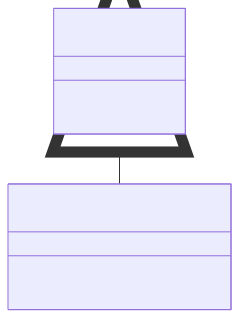

In [ ]:
# @title
mm("""
classDiagram
    Exercise <|-- Squat
    Exercise : +perform()
    Squat : +perform()  // overridden
""")

The diagram shows how `Squat` inherits from `Exercise` but **redefines** `perform`.


## Polymorphism: Many Forms, One Interface

Now that we can **override** methods, we can explore a bigger idea: **polymorphism**. The word comes from Greek: *poly* = many, *morph* = form. In programming, **polymorphism** means one variable type can point to many different kinds of objects, and the correct method will run depending on the object’s actual type.

In Java, polymorphism works when we use a **parent class reference** to point to different **child class objects**.

Here’s an example using our `Exercise` framework:


In [ ]:
%%writefile TestWorkout.java
public class TestWorkout {
    public static void main(String[] args) {
        Exercise e1 = new PushUp();    // parent reference, child object
        Exercise e2 = new Squat(15);   // parent reference, child object

        e1.perform();  // calls PushUp's version
        e2.perform();  // calls Squat's version
    }
}

Overwriting TestWorkout.java


In [ ]:
!javac TestWorkout.java
!java TestWorkout

Performing Push-Up
Doing 15 squats!


### What Happens Here

* Both `e1` and `e2` are declared as type **Exercise**.
* But at runtime, Java looks at the **actual object type** (PushUp or Squat) and runs the correct `perform()` method.
* This is called **dynamic method dispatch**—a fancy way of saying “Java picks the right method at runtime.”

### A Real-World Analogy

Imagine our workout app has a “Start Exercise” button. The app doesn’t need to know whether the user chose push-ups, squats, or burpees. It just calls `perform()`—and the right thing happens for the hero.

### Visual Model

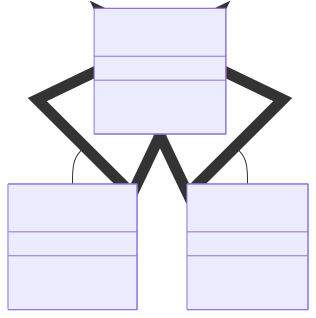

In [ ]:
mm("""
classDiagram
    Exercise <|-- PushUp
    Exercise <|-- Squat
    Exercise : +perform()
    PushUp : +perform()
    Squat : +perform()""")

When we store different exercises in an `Exercise` variable, we get polymorphic behavior: **one interface, many forms.**

### Example with a List

In [ ]:
%%writefile WorkoutPlan.java
import java.util.ArrayList;

public class WorkoutPlan {
    public static void main(String[] args) {
        ArrayList<Exercise> plan = new ArrayList<>();
        plan.add(new PushUp());
        plan.add(new Squat(10));

        for (Exercise e : plan) {
            e.perform();
        }
    }
}

Writing WorkoutPlan.java


In [ ]:
!javac WorkoutPlan.java
!java WorkoutPlan

Performing Push-Up
Doing 10 squats!


The same loop can handle any future exercises—whether She-Ra’s magic lunges or Hulk’s burpees—without changing the code. That’s the true power of polymorphism.

## Exercise: Build Gym Clients with Inheritance

You will model **clients of a gym** as Java objects. Start from a small base class named `Client`, then create two subclasses that customize behavior for different kinds of customers (our test names will be He-Man, She-Ra, and the Hulk). This exercise is **independent** of earlier code.

A **class** is a blueprint for objects. A **constructor** initializes a new object. The keyword **extends** declares that one class is a subclass of another. To **override** is to replace a parent method in a child class using the *same* method signature. The **main method** (`public static void main(String[] args)`) is a program’s entry point. To **instantiate** is to create an object with `new`.

### Base class you may use as-is

`Client` represents any gym client with a name and an experience level from 1–10. It provides a default plan and a simple check-in line.

In [ ]:
%%writefile Client.java
public class Client {
    private String name;
    private int experience; // 1 (new) ... 10 (expert)

    public Client(String name, int experience) {
        this.name = name;
        this.experience = experience;
    }

    public String getName() { return name; }
    public int getExperience() { return experience; }

    public String planForToday() {
        return "Walk 10 minutes and stretch.";
    }

    public void checkIn() {
        System.out.println("Welcome, " + name + "!");
    }
}

Writing Client.java


This design invites inheritance: subclasses will **override** `planForToday()` to give better guidance.

### What your two subclasses must do (you write them)

| Subclass name    | New fields you add    | Required constructor behavior                                                                                                         | Required method overrides / behavior                                                                                                                                                                                                             |
| ---------------- | --------------------- | ------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| `StrengthClient` | `String favoriteLift` | Takes `name`, `experience`, and `favoriteLift`; calls the parent constructor via `super(name, experience)` and stores `favoriteLift`. | **Override** `planForToday()` to return a short string that mentions the favorite lift and varies with experience (e.g., beginners get fewer sets). Optionally **override** `checkIn()` to add “Time to lift!” after calling `super.checkIn()`.  |
| `CardioClient`   | `int targetMinutes`   | Takes `name`, `experience`, and `targetMinutes`; calls `super(name, experience)` and stores `targetMinutes`.                          | **Override** `planForToday()` to return a short string that mentions the target minutes and varies with experience (e.g., faster pace for higher experience). Optionally **override** `checkIn()` to add “Bring water!” after `super.checkIn()`. |

The annotation `@Override` helps the compiler confirm you matched the parent method’s signature.

Short stubs to guide you:


In [ ]:
%%writefile StrengthClient.java
public class StrengthClient extends Client {
    // TODO: private String favoriteLift;

    // TODO: public StrengthClient(String name, int experience, String favoriteLift) {
    //   super(name, experience); // initialize parent part
    //   // store favoriteLift
    // }

    @Override
    public String planForToday() {
        // TODO: return a plan string that mentions favoriteLift
        // and scales sets/reps by getExperience()
        return "TODO";
    }

    // Optional:
    // @Override
    // public void checkIn() {
    //   super.checkIn();
    //   System.out.println("Time to lift!");
    // }
}


Writing StrengthClient.java


In [ ]:
%%writefile CardioClient.java
public class CardioClient extends Client {
    // TODO: private int targetMinutes;

    // TODO: public CardioClient(String name, int experience, int targetMinutes) {
    //   super(name, experience);
    //   // store targetMinutes
    // }

    @Override
    public String planForToday() {
        // TODO: return a plan string that mentions targetMinutes
        // and adjusts pace by getExperience()
        return "TODO";
    }

    // Optional:
    // @Override
    // public void checkIn() {
    //   super.checkIn();
    //   System.out.println("Bring water!");
    // }
}

Writing CardioClient.java


A quick picture of the relationships:


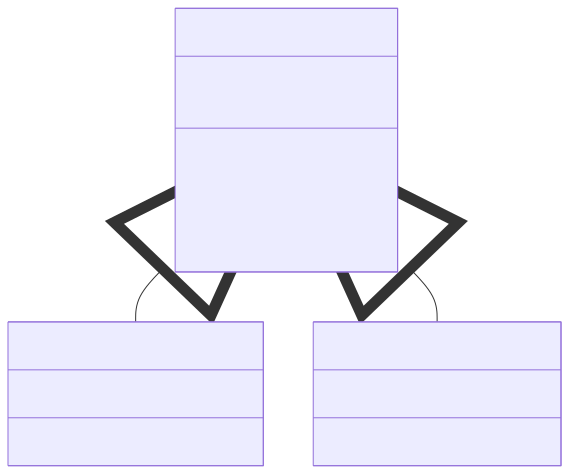

In [ ]:
# @title
mm("""
classDiagram
    Client <|-- StrengthClient
    Client <|-- CardioClient
    class Client {
      - String name
      - int experience
      + Client(String,int)
      + getName() String
      + getExperience() int
      + planForToday() String
      + checkIn() void
    }
    class StrengthClient {
      - String favoriteLift
      + planForToday() String
    }
    class CardioClient {
      - int targetMinutes
      + planForToday() String
    }
""")

### Test class skeleton (you complete it)

Write a client program that **instantiates** your subclasses and calls their methods. Save as `ClientTest.java`.

In [ ]:
%%writefile ClientTest.java
public class ClientTest {
    public static void main(String[] args) {
        Client a = new Client("Alex", 2);
        a.checkIn();
        System.out.println(a.planForToday());

        // TODO: instantiate your subclasses (choose heroic names!)
        // Client b = new StrengthClient("He-Man", 8, "bench press");
        // Client c = new CardioClient("She-Ra", 6, 30);
        // Client d = new StrengthClient("Hulk", 9, "deadlift");

        // TODO: call checkIn() and print planForToday() for b, c, d

        // TODO: put them in a Client[] or java.util.ArrayList<Client>
        // and loop, printing each getName() + planForToday()
    }
}

Writing ClientTest.java


In [ ]:
!javac Client.java StrengthClient.java CardioClient.java ClientTest.java
!java ClientTest

**TODO checklist**

1. Implement `StrengthClient` and `CardioClient` per the table.
2. Use `super(...)` in each constructor and `@Override` on each overridden method.
3. In `ClientTest`, create at least **three** clients (mix of base and subclasses) and print both `checkIn()` and `planForToday()` for each.
4. Stretch: compute an “effort score” for each client using `getExperience()` and print the highest scorer’s name.


## Interfaces: Tiny Contracts, Big Flexibility

Sometimes we only care that an object can answer a question, not how it computes the answer. An **interface** is a **contract**: a named set of **method signatures** (name + parameters + return type) with **no bodies**. A class that **implements** an interface promises to provide concrete methods with exactly those signatures. In Java, we write interfaces with the keyword `interface`, attach them with `implements`, and the declared methods are **abstract** (no code) by default.

A minimal contract for our fitness world is that any activity can report its **name** and an integer **calories** estimate:

In [16]:
%%writefile Trackable.java
interface Trackable {
    String name();     // abstract method: no body here
    int calories();    // abstract method: no body here
}


Writing Trackable.java


Two different classes can implement this contract in different ways. That is the point: shared questions, diverse answers.

In [17]:
%%writefile JumpingJacks.java
class JumpingJacks implements Trackable {
    private final int reps;
    public JumpingJacks(int reps) { this.reps = reps; }

    @Override public String name() { return "Jumping Jacks"; }
    @Override public int calories() { return reps; } // 1 cal per rep (toy model)
}

Writing JumpingJacks.java


In [18]:
%%writefile SledPull.java
class SledPull implements Trackable {
    private final int meters, kg;
    public SledPull(int meters, int kg) { this.meters = meters; this.kg = kg; }

    @Override public String name() { return "Sled Pull"; }
    @Override public int calories() { return meters * kg / 20; } // simple estimate
}

Writing SledPull.java


Now we can write code that talks to the **interface type** `Trackable` and let **polymorphism** do the work at runtime—each object computes calories its own way, but our loop is the same.

In [19]:
%%writefile InterfaceDemo.java
// Save as InterfaceDemo.java; only this class is public.
// The interface and the two classes above could live in this same file (no 'public' on them).
// We've put them in separate files for clarity
public class InterfaceDemo {
    public static void main(String[] args) {
        Trackable[] plan = {
            new JumpingJacks(50),
            new SledPull(60, 80),
            new JumpingJacks(30)
        };

        int total = 0;
        for (Trackable t : plan) {
            System.out.println(t.name() + " → " + t.calories() + " cal");
            total += t.calories();
        }
        System.out.println("Total: " + total + " cal");
    }
}

Writing InterfaceDemo.java


In [20]:
!javac InterfaceDemo.java
!java InterfaceDemo

Jumping Jacks → 50 cal
Sled Pull → 240 cal
Jumping Jacks → 30 cal
Total: 320 cal



When you run `InterfaceDemo`, the loop calls the same two methods—`name()` and `calories()`—on each item. Because both classes **implement** `Trackable`, the compiler accepts the code; because each class provides its own bodies, the results differ.

The language around interfaces can be a bit complex. Here's a quick reference:

| **Term**            | **Definition**                                                                                                          |
| ------------------- | ----------------------------------------------------------------------------------------------------------------------- |
| **interface**       | A contract listing method signatures (no bodies) that classes agree to implement.                                       |
| **implements**      | Java keyword used by a class to attach an interface and promise matching methods.                                       |
| **abstract method** | A method declaration without a body; in interfaces, methods are abstract by default.                                    |
| **polymorphism**    | Using a parent/interface type (`Trackable`) to refer to many concrete objects and dispatch the right method at runtime. |


### Representing Interfaces Graphically
Here's how you can represent interface using **UML** diagrams:

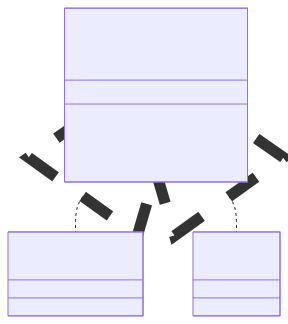

In [ ]:
mm("""
classDiagram
    class Trackable {
      <<interface>>
      + name() String
      + calories() int
    }
    Trackable <|.. JumpingJacks
    Trackable <|.. SledPull

""")

## Multiple interfaces: mixing abilities

Java allows a class to **implement** more than one **interface**. An **interface** is a **contract**: a named set of **method signatures** (name, parameters, return type) with no bodies. To **implement** is to promise concrete methods that match those signatures. This gives us “mix-and-match” abilities without forcing deep inheritance trees. Java keeps **single inheritance** for classes (one parent via `extends`) but permits **multiple interface** contracts (comma-separated after `implements`). The result is flexible design: we talk to objects through capability-types rather than concrete classes.

Consider two small abilities. **Trackable** means an activity can state its name and an integer calorie estimate. **Timed** means an activity can state its duration in minutes. These are orthogonal: some activities are trackable but not timed, others timed but not trackable, and many are both.

```java
interface Trackable { String name(); int calories(); }
interface Timed { int minutes(); }
```

A single class can mix both abilities. The syntax places both contracts after `implements`. Each method is short and explicit so the promise is clear.

```java
class BattleRope implements Trackable, Timed {
    private final int slams, mins;
    BattleRope(int slams, int mins) { this.slams = slams; this.mins = mins; }
    public String name() { return "Battle Rope"; }
    public int calories() { return slams / 2 + mins * 3; }
    public int minutes() { return mins; }
}
```

Another class can fulfill the same contracts differently. The interface type stays the same; the implementation varies. This is **polymorphism**: a single interface reference can point to many concrete classes, and the right method bodies run at runtime.

```java
class HillSprints implements Trackable, Timed {
    private final int repeats, mins;
    HillSprints(int repeats, int mins) { this.repeats = repeats; this.mins = mins; }
    public String name() { return "Hill Sprints"; }
    public int calories() { return repeats * 8; }
    public int minutes() { return mins; }
}
```

Once abilities are formalized as interfaces, client code can program “to the contract.” We can store mixed activities as `Timed` when we care about duration, or as `Trackable` when we care about calories. The compiler enforces correct use without knowing concrete classes.

```java
// Idea sketch (not a full program):
Timed t = new BattleRope(120, 10);
Trackable x = new HillSprints(6, 12);
// t.minutes();                       // OK: Timed ability
// x.calories(); x.name();            // OK: Trackable ability
```


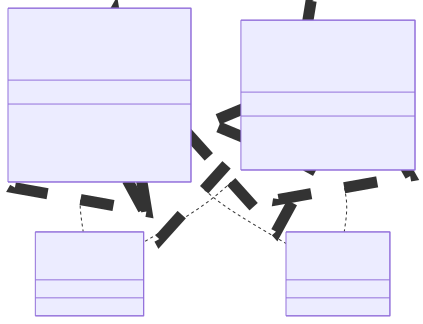

In [ ]:
# @title
mm("""
classDiagram
    class Trackable {
      <<interface>>
      + name() String
      + calories() int
    }
    class Timed {
      <<interface>>
      + minutes() int
    }
    Trackable <|.. BattleRope
    Timed <|.. BattleRope
    Trackable <|.. HillSprints
    Timed <|.. HillSprints
""")

## Exercise: Implement a Tiny Interface (with new classes)

Interfaces are one of Java’s quiet superpowers. An **interface** is a **contract**—a named set of **method signatures** (method name + parameter types + return type) with no bodies. When a class **implements** an interface, it promises to provide concrete methods that match those signatures exactly. The reward is **polymorphism**: code that talks to the contract can work with many different classes, each answering in its own way.

Think of this like event rules at a school competition. The rulebook says, “Every team must have a team name and a score.” That’s the interface. Chess teams and robotics teams can both enter, but they compute scores differently. The judge’s clipboard doesn’t care how each team scored; it just calls `name()` and `score()` on everyone and tallies the results.

### The contract (define first, then use)

We’ll define a minimal interface called `Scorable`. Put it in its own file. The names are intentionally plain so your focus stays on the shape of the API.

In [ ]:
%%writefile Scorable.java
public interface Scorable {
    String name();   // short label for display
    int score();     // simple integer score
}

Writing Scorable.java


This `interface` introduces the contract. Each line inside declares an **abstract method**—a method with a signature but no body. Classes will provide the bodies.

### Two brand-new classes that implement the contract

You will write two new classes. Keep fields `private`, initialize them in a constructor, and use `@Override` so the compiler confirms you matched the method signatures exactly.


In [ ]:
%%writefile BearCrawl.java
public class BearCrawl implements Scorable {
    // TODO: private int meters, slope;

    // TODO: public BearCrawl(int meters, int slope) { ... }

    @Override
    public String name() {
        // TODO: return the exercise name;
        return null;
    }

    @Override
    public int score() {
        // Transparent rule (easy to sanity-check):
        // e.g., meters + 2 * slope
        return 0;
    }
}

In [ ]:
%%writefile KettlebellSwing.java
public class KettlebellSwing implements Scorable {
    // TODO: private int sets, kg;

    // TODO: public KettlebellSwing(int sets, int kg) { ... }

    @Override
    public String name() {
        // TODO: return exercise name;
        return null;
    }

    @Override
    public int score() {
        // Simple, explainable rule (choose one):
        // e.g., sets * kg / 5
        return 0;
    }
}

Writing KettlebellSwing.java


Notice the rhythm: declare fields, write a constructor that stores them, then implement the two required methods. The formulas should be simple enough that you can explain them to a friend without a calculator.

### A small tester that treats everything through the interface

Your tester should know only the **interface type** `Scorable`. It will create a few different objects, ask each for its name and score, and total the results. Add a third, custom class of your own design (different from the two above) to prove the pattern is general.

In [ ]:
%%writefile ScorableDemo.java
public class ScorableDemo {
    public static void main(String[] args) {
        Scorable[] items = {
            // TODO: new KettlebellSwing(...),
            // TODO: new BearCrawl(...),
            // TODO: new YourCustomClass(...)
        };

        int total = 0;
        for (Scorable s : items) {
            System.out.println(s.name() + " -> " + s.score());
            total += s.score();
        }
        System.out.println("Total score: " + total);
    }
}


Writing ScorableDemo.java


In [ ]:
!javac Scorable.java
!java ScorableDemo

If you’ve matched the method signatures properly, the compiler is happy. At runtime, **dynamic dispatch** ensures the correct `score()` runs for each object.

### What each term means (so you can check yourself)

| **Term**             | **Precise definition**                                         | **How to verify in your code**                                                 |
| -------------------- | -------------------------------------------------------------- | ------------------------------------------------------------------------------ |
| **interface**        | A contract listing method signatures with no bodies.           | File has `public interface Scorable` and only method declarations.             |
| **implements**       | A class attaches a contract and promises those methods.        | Class header is `class X implements Scorable`.                                 |
| **method signature** | Method name + parameter types + return type.                   | `String name()` and `int score()` appear exactly, no extra params.             |
| **abstract method**  | Declared without a body; must be implemented by classes.       | Methods in `Scorable` end with `;` not `{ }`.                                  |
| **polymorphism**     | Use a parent/interface type to refer to many concrete objects. | `Scorable[] items` holds different classes; the loop still works.              |
| **dynamic dispatch** | Runtime chooses which overridden body to execute.              | Each object’s own `score()` runs, even though the variable type is `Scorable`. |

### A small map of what you’re building


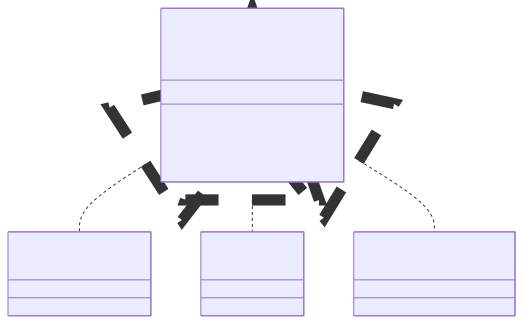

In [ ]:
# @title
mm("""
classDiagram
    class Scorable {
      <<interface>>
      + name() String
      + score() int
    }
    Scorable <|.. KettlebellSwing
    Scorable <|.. BearCrawl
    Scorable <|.. YourCustomClass"""
)

Common compile errors and quick fixes:

| **Symptom**                                       | **Likely cause**                                                 | **Fix**                                                               |
| ------------------------------------------------- | ---------------------------------------------------------------- | --------------------------------------------------------------------- |
| “method does not override or implement a method”  | Misspelled method (`scores()` vs `score()`) or wrong return type | Match the **signature** exactly; keep `@Override` to catch this early |
| “class X is not abstract and does not override …” | You declared `implements Scorable` but didn’t write both methods | Implement **both** `name()` and `score()`                             |
| “cannot find symbol: constructor …”               | Constructor parameters don’t match your `new` call               | Check the tester’s arguments against your class constructor signature |

Write clean, small methods; pick formulas you can defend; and let the interface keep your tester blissfully unaware of class details.


## Abstract classes: blueprints with shared code

When several classes share structure and behavior, but each must still supply its own key action, an **abstract class** is useful. An **abstract class** is a class declared with the keyword **abstract**; it can contain **fields**, **constructors**, and **concrete methods** (with bodies), as well as **abstract methods** (no bodies). An **abstract method** must be implemented by any **concrete subclass**. Abstract classes **cannot be instantiated**.

**Syntax**:

* `abstract class Name { ... }` declares a class that may include abstract methods.
* `abstract returnType methodName(params);` declares an abstract method (no `{ }` body).
* `class Child extends Parent { ... }` uses **extends** to inherit from a parent class.

We’ll switch contexts to keep your mental model flexible. Imagine a training app that schedules **movements**. Each movement warms up the athlete the same way, but the actual performance differs.

```java
// A general blueprint
public abstract class Movement {
    private final String name;

    public Movement(String name) { this.name = name; }

    public void warmup() {                    // concrete method (shared code)
        System.out.println("Warmup: light mobility for " + name);
    }

    public String getName() { return name; }  // concrete helper

    public abstract void perform();           // abstract method (no body)
}
```

Two different concrete movements implement the missing action:

```java
public class PlyoJump extends Movement {
    public PlyoJump() { super("Plyometric Jumps"); }

    @Override
    public void perform() {
        System.out.println("Explosive sets of box jumps.");
    }
}
```

```java
public class IsometricHold extends Movement {
    public IsometricHold() { super("Isometric Hold"); }

    @Override
    public void perform() {
        System.out.println("Hold a stable position for controlled time.");
    }
}
```

Here are the key points:

* You **cannot** write `new Movement(...)` because `Movement` is abstract.
* You **can** call shared code (`warmup()`, `getName()`) on any subclass.
* Each subclass **must** supply `perform()`—that is the contract.

**How do interfaces and abstract classes compare?** It's easy to confuse abstract classes with interfaces, and to use one where you should be using the other. Here's a quick cheat sheet:

| Concept            | Precise definition                                                                  | Can have fields/constructors?                  | Can have method bodies?                                                                           | Inheritance relationship                                       |
| ------------------ | ----------------------------------------------------------------------------------- | ---------------------------------------------- | ------------------------------------------------------------------------------------------------- | -------------------------------------------------------------- |
| **interface**      | A contract of method **signatures** only (no state by default).                     | No fields for instance state; no constructors. | No bodies for abstract methods (default), though `default`/`static` methods exist in modern Java. | A class **implements** one or more interfaces.                 |
| **abstract class** | A class that may include **abstract methods** and **concrete methods**, plus state. | Yes, fields and constructors allowed.          | Yes, regular method bodies and abstract methods.                                                  | A class **extends** at most one abstract (or concrete) parent. |

And, finally, here's how we depict abstract classes in our UML:


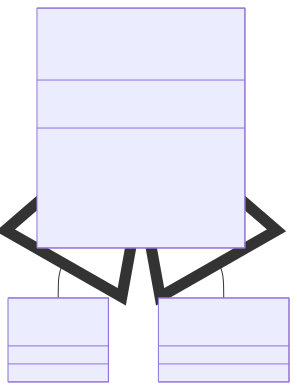

In [ ]:
# @title
mm("""
classDiagram
    class Movement {
      <<abstract>>
      - String name
      + Movement(String)
      + warmup() void
      + getName() String
      + perform() void*
    }
    Movement <|-- PlyoJump
    Movement <|-- IsometricHold
""")

You'll notice that some methods (the abstract ones) are in italics, while other (the concrete ones) are in normal text.

## Object references and types: compile-time vs runtime

In Java, a variable does not “contain” an object; it holds a **reference**—a pointer—to an object stored elsewhere in memory. A **type** tells the compiler what operations are allowed on that reference. In polymorphic code these come apart: the **static type** (the type written in your code for the variable) may differ from the **runtime type** (the actual class of the object the reference points to). Methods you may *call* are checked against the static type; which *implementation* runs is chosen using the runtime type.

- **reference**: a value that points to an object in memory (not the object itself).
- **static type**: the declared type of a reference at compile time (what the variable is typed as).
- **runtime type**: the actual class of the object the reference currently points to.
- **upcasting**: treating a child object as a parent type; implicit and always safe.
- **downcasting**: treating a parent-typed reference as a child type; explicit and potentially unsafe.
- **polymorphic call**: a method call where the compiler sees the parent/interface method, and at runtime the child’s overridden version runs (dynamic dispatch).

### A tiny example that separates the ideas

```java
Exercise x = new Squat(12);
// static type of x: Exercise
// runtime type of x: Squat

x.perform();        // OK: perform() is in Exercise; Squat’s override runs
// x.getReps();     // ❌ compile error: getReps() not in Exercise

if (x instanceof Squat) {
    Squat s = (Squat) x;   // downcast after checking
    System.out.println(s.getReps()); // now OK
}
```
In Java code, you'll end up doing these sorts of checks fairly frequently (checking whether a given object is an **instance of** a class, and then **casting** the variable to that class.

The compiler allows `perform()` because **Exercise** declares it. At runtime, **Squat**’s override executes. The compiler *rejects* `getReps()` through `x` because `getReps()` is not part of the static type `Exercise`. After a checked downcast, the call is legal.

### What the compiler checks vs what the JVM does

| Question                                    | Answer (rule)                                                        | Example                                              |
| ------------------------------------------- | -------------------------------------------------------------------- | ---------------------------------------------------- |
| What methods may I call?                    | Only those in the **static type** (or its ancestors).                | `x.perform()` allowed if `perform` is in `Exercise`. |
| Which method body runs?                     | The override from the **runtime type**.                              | `Squat.perform()` runs, not `Exercise.perform()`.    |
| Can I assign child → parent? (**upcast**)   | Yes, implicit and safe.                                              | `Exercise x = new Squat(12);`                        |
| Can I assign parent → child? (**downcast**) | Only with an explicit cast; may fail at runtime.                     | `(Squat) x` after `instanceof` check.                |
| Fields (not methods)?                       | Field access is based on the **static type**; fields don’t override. | Avoid relying on “hiding” fields; prefer methods.    |

### A simple memory picture

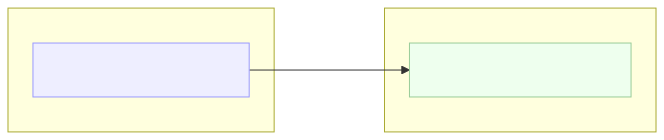

In [ ]:
# @title
mm("""
flowchart LR
    A["Exercise x (reference)"] -->|points to| B["new Squat(12) (object)"]
    subgraph Static view
    A:::static
    end
    subgraph Runtime view
    B:::runtime
    end
classDef static fill:#eef,stroke:#99f;
classDef runtime fill:#efe,stroke:#9c9;""")

points to a **Squat** object (runtime view).

### Safe patterns for beginners

1. Program to a **parent or interface** type so your code stays general.

   ```java
   Trackable t = new HillSprints(6, 12);  // upcast: fine
   System.out.println(t.calories());      // allowed by the interface
   ```
2. Avoid downcasts; when necessary, **check first**.

   ```java
   if (t instanceof HillSprints) {
       HillSprints hs = (HillSprints) t;  // explicit, after check
       // use hs-specific methods here
   }
   ```
3. If you need a method on every object in a collection, **put it in the interface/parent** rather than casting everywhere. This keeps polymorphic loops clean and safe.

### Frequent mistakes and fixes

| Mistake                                                     | Why it happens                                           | Fix                                                                    |
| ----------------------------------------------------------- | -------------------------------------------------------- | ---------------------------------------------------------------------- |
| Calling a subclass-only method on a parent-typed variable   | Method not in the static type, so the compiler blocks it | Add the method to the interface/parent, or downcast after `instanceof` |
| Casting without checking                                    | May throw `ClassCastException` at runtime                | Use `instanceof` (or redesign to avoid casts)                          |
| Expecting fields to “override”                              | Fields don’t participate in dynamic dispatch             | Access via methods that can be overridden                              |
| Mixing types in arrays/lists then assuming a single subtype | The static type is general; objects vary                 | Keep code polymorphic, or check/cast per element carefully             |

## Exercise: Abstract Person hierarchy

You will practice **abstract classes** and **polymorphism** in a single Java file. An **abstract class** (declared with `abstract`) can hold fields, constructors, and normal methods, but it may also declare **abstract methods** (no bodies) that **concrete subclasses** must implement. Use `extends` for inheritance, `super(...)` to call a parent constructor, and `@Override` to replace behavior.

**Goal:** write an abstract **`Person`** with a shared greeting, then two concrete subclasses—**`Coach`** and **`Rookie`**—that supply their own daily plans. Finish with a tiny tester that treats them as `Person` objects and calls the same methods.

In [ ]:
%%writefile PersonExercise.java
// Starter with TODOs — fill them in. Keep methods short and readable.

// ===== Abstract parent =====
abstract class Person {
    // TODO: private field for the person's name
    // TODO: constructor Person(String name) that stores the name
    // TODO: public String getName()

    // Shared behavior (concrete method)
    public String greet() {
        // TODO: return a short friendly greeting that uses the person's name
        return null; // replace
    }

    // Required behavior (abstract method — no body here)
    public abstract String dailyPlan(); // each subclass must provide its own plan
}

// ===== Concrete subclass 1 =====
class Coach extends Person {
    // TODO: private String specialty;  // e.g., "strength", "mobility"

    // TODO: constructor Coach(String name, String specialty)
    //   - call the parent constructor with super(name)
    //   - store specialty

    @Override
    public String dailyPlan() {
        // TODO: return a one-line plan that mentions the specialty
        // e.g., "Coach plan: technique drills for strength."
        return null; // replace
    }

    // (Optional) @Override greet() to add a coachy flourish; call super.greet() first.
}

// ===== Concrete subclass 2 =====
class Rookie extends Person {
    // TODO: private int level; // 1 (beginner) ... 10 (advanced)

    // TODO: constructor Rookie(String name, int level)
    //   - call super(name)
    //   - store level

    @Override
    public String dailyPlan() {
        // TODO: return a one-line plan that adapts to level
        // e.g., "Rookie plan: easy circuit (level 2)."
        return null; // replace
    }
}

// ===== Tiny tester (treat everything as Person) =====
public class PersonExercise {
    public static void main(String[] args) {
        // TODO: instantiate at least one Coach and one Rookie with sensible values
        // Person a = new Coach(...);
        // Person b = new Rookie(...);

        // TODO: put them into a Person[] or java.util.ArrayList<Person>
        // Person[] people = { a, b };

        // TODO: loop over the collection:
        //   - print p.greet()
        //   - print p.dailyPlan()
        //   - observe: same calls, different outputs (polymorphism)
    }
}


In [ ]:
!javac PersonExercise.java
!java PersonExercise

**Checklist**

| Item                    | What to do                                                              | Why it matters                                   |
| ----------------------- | ----------------------------------------------------------------------- | ------------------------------------------------ |
| **abstract class**      | Declare `abstract class Person` and one `abstract` method `dailyPlan()` | Forces subclasses to supply the missing behavior |
| **constructor + super** | In each subclass constructor, call `super(name)`                        | Initializes the parent part correctly            |
| **override**            | Mark subclass methods with `@Override`                                  | The compiler verifies the **method signature**   |
| **encapsulation**       | Keep fields `private`; use constructor + getters                        | Clear, safe object design                        |
| **polymorphism**        | Store mixed objects as `Person` and call the same methods               | One loop, many behaviors without casts   

## Static and final: class-wide tools and unchangeable things

When many objects need the *same* fact or helper, putting that data on each object is wasteful and error-prone. If one copy drifts out of sync, bugs creep in. **static** solves this by creating **one class-level member** shared by every instance. When some values must never change after they are set—IDs, constants, configuration knobs—**final** guards them. The real payoff is **clarity**: readers immediately see what is shared and what is locked down, so the codebase has fewer moving parts.

- **static**: a **class-level** member shared by all instances, accessed as `ClassName.member`. A **static method** has no `this` and does not read instance fields.
- **final**: **unchangeable** after initialization. A **final variable** cannot be reassigned; a **final method** cannot be overridden; a **final class** cannot be extended.

A small, concrete use: a shared conversion constant and a stateless helper.

```java
class GymMath {
    public static final double KG_TO_LB = 2.20462;
    public static double toPounds(double kg) { return kg * KG_TO_LB; }
}
```

Why this design helps: there is a **single source of truth** for the conversion rate; every caller sees the same value; tests do not need to fabricate objects just to call `toPounds`.

You also use **final** to make identities stable. An ID that can change mid-program is a recipe for subtle bugs.

```java
class Membership {
    private final String id;              // set once, then fixed
    public Membership(String id) { this.id = id; }
    public String id() { return id; }
}
```

This makes it safe to pass `Membership` around; downstream code can rely on `id()` always returning the same string. Note an important nuance: **final reference vs. mutable object**. If `id` were an object with internal state, `final` would freeze the *reference*, not the object’s internals.

```java
final StringBuilder sb = new StringBuilder("hi");
// sb = new StringBuilder("bye");     // ❌ cannot reassign (final reference)
// sb.append(" there");                // ✅ contents can change (object is mutable)
```

Short example of a **final method** that asserts a non-negotiable rule in a hierarchy:

```java
class Person {
    public final String role() { return "member"; }  // guaranteed, not overridable
}
```

This guarantees a baseline contract across subclasses; useful for invariants and security checks.

### Why these keywords matter in practice

Students often reach for instance fields and ad-hoc numbers (“magic numbers”). Centralizing constants as `public static final` eliminates duplication, improves readability (“where did 2.20462 come from?”), and prevents accidental edits. Similarly, `static` utility methods make intent explicit: “this calculation has no per-object state.” **final** communicates design intent: “this won’t change.” That intent helps the compiler catch mistakes and helps human readers reason about the code—especially in larger projects or concurrent programs where shared mutable state is dangerous.

A compact reference:

| Feature                 | Exact effect                                    | Typical use                              |
| ----------------------- | ----------------------------------------------- | ---------------------------------------- |
| **static field**        | One shared variable per class                   | Caches, counters, universal flags        |
| **static method**       | Callable via `ClassName.m(...)`; no `this`      | Utilities, factories, pure calculations  |
| **final local/field**   | Assigned once; no reassignment                  | IDs, knobs, constants                    |
| **final method**        | Cannot be overridden                            | Enforce invariants across subclasses     |
| **final class**         | Cannot be subclassed                            | Immutable value types, utility holders   |
| **public static final** | Compile-time **constant** (primitives/`String`) | `Math.PI`, version strings, unit factors |

### Instance vs. static (design choice, not just syntax)

Prefer **instance members** when behavior depends on an object’s state; prefer **static** when behavior is the same for everyone and uses no instance data. Overusing static can hurt testability (shared state leaks between tests), while underusing it spreads the same value across many objects.

| Question                       | Instance member                         | Static member                                                   |
| ------------------------------ | --------------------------------------- | --------------------------------------------------------------- |
| How do you access it?          | `obj.method()`                          | `ClassName.method()`                                            |
| Shares state across objects?   | No                                      | Yes (one copy)                                                  |
| Uses `this` / instance fields? | Yes                                     | No                                                              |
| Interacts with overriding?     | Methods can be overridden (polymorphic) | Methods are **hidden**, not overridden—treat as non-polymorphic |

**Smells to avoid.** A `static` field that changes often behaves like a global variable—hard to reason about and hard to test. A `final` field that holds a mutable object may still allow hidden changes; prefer immutable types (e.g., `String`, records) for true constants. Use `public static final` only for values known at compile time; otherwise keep fields `private` and expose read-only accessors.

In short, use **static** to say “one shared fact,” and **final** to say “this cannot change.” Those two signals make programs easier to read, test, and trust.


## How this connects to what you already know (main, System.out.println, toString)

You’ve been using `public static void main`, `System.out.println`, and object printing since the first week. With **inheritance**, **interfaces**, and **static/final** under your belt, we can now *explain* why they look the way they do. Think of this section as putting names to habits you already have.

### The key ideas, stated carefully

| **Term**             | **Precise definition**                                                                                    | **Why beginners care**                                                       |
| -------------------- | --------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------- |
| **static**           | Belongs to the **class** itself, not to any one object. Access with `ClassName.member`.                   | Lets the program *start* and share tools without creating objects.           |
| **entry point**      | The exact method the JVM calls to begin running your code.                                                | Explains why `main` has a fixed shape.                                       |
| **instance method**  | A method that uses an object’s state via `this`.                                                          | Explains why `println` depends on the *stream object* it prints to.          |
| **override**         | A subclass provides a new body with the **same method signature** as the parent.                          | Powers “print my object nicely” via `toString()`.                            |
| **dynamic dispatch** | At runtime, Java picks the most specific overridden method to run based on the object’s **actual class**. | `System.out.println(x)` calls *your* `toString()` if you wrote one.          |
| **interface**        | A **contract** listing method signatures (no bodies) that many classes can implement.                     | Shows why code talks to “capabilities” like `List`, not to specific classes. |

### Why `main` is `public static void main(String[] args)`

Before any objects exist, the JVM must be able to *call something*. A **static** method belongs to the class, so it doesn’t need an object. That is why `main` is static and has a fixed **signature** (name + parameter types + return type) the JVM recognizes.

```java
// No object required: the JVM can call this directly.
public class Launcher {
    public static void main(String[] args) {
        // start your program here
    }
}
```

* **public**: the JVM (outside your class) must be able to call it.
* **static**: no object exists yet.
* **void**: nothing is returned to the JVM.
* **String\[] args**: command-line arguments arrive as an array of strings.

### Why `System.out.println` mixes static and instance

`System` is a class that exposes one shared print stream, `out`. That field is **public static final** (a constant reference), so everyone can use the same stream. But `println` is an **instance method** of the stream object (`PrintStream`), because printing depends on the stream’s state (buffering, destination, etc.).


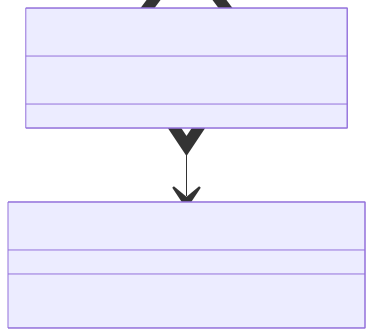

In [ ]:
mm("""
classDiagram
    class System {
      + out : PrintStream  // public static final
    }
    class PrintStream {
      + println(String) void  // instance method
    }
    System o--> PrintStream : shares 'out'""")

Short code to read with this picture in mind:

```java
System.out.println("Hello"); // System (class) → out (shared object) → println (instance)
```

* **System**: class name (no object).
* **out**: one shared stream object (a constant).
* **println**: method *on that object*.

### Why printing an object calls *your* `toString()`

Every class ultimately extends `java.lang.Object`, which defines a default `toString()`. When you **override** `toString()` in your class, **dynamic dispatch** ensures your version runs—even if the variable is typed as a parent or an interface.

```java
class Badge {
    private final String name;
    public Badge(String n) { this.name = n; }

    @Override
    public String toString() {   // override: same signature, new body
        return "Badge(" + name + ")";
    }
}

Object x = new Badge("Rookie");  // static type: Object; runtime type: Badge
System.out.println(x);           // prints: Badge(Rookie)  ← your toString()
```

* The **static type** (`Object`) limits which methods you may *call* at compile time.
* The **runtime type** (`Badge`) decides *which body runs* at print time.

### Why you write `List<String> xs = new ArrayList<>();`

`List` is an **interface**—a contract for list behavior. `ArrayList` is one **implementation**. By programming to the contract, you let Java choose different concrete classes later (e.g., `LinkedList`) without changing your loop logic.

```java
import java.util.*;

List<String> xs = new ArrayList<>(); // talk to the interface
xs.add("A"); xs.add("B");
Collections.sort(xs);                // works because elements are Comparable
```

This is the same idea you used in the chapter: write loops against a parent type (**inheritance**) or an **interface**, and let **polymorphism** pick the right method bodies.

### Putting the pieces side by side

| Familiar code                  | Chapter idea that explains it                         | What to notice now                                                  |
| ------------------------------ | ----------------------------------------------------- | ------------------------------------------------------------------- |
| `public static void main(...)` | **static** + fixed **signature** (entry point)        | The program starts *before* objects exist.                          |
| `System.out.println(...)`      | **public static final** field + **instance** method   | Class gives one shared stream; the stream object does the printing. |
| Printing objects nicely        | **override** + **dynamic dispatch**                   | Your `toString()` runs even through a parent-typed reference.       |
| `List` / `ArrayList`           | **interfaces** + **polymorphism**                     | Code talks to the contract; many classes can satisfy it.            |
| `Math.PI`, `Math.sqrt`         | **public static final** constant + **static** utility | One agreed value; stateless helpers don’t need objects.             |

Short mental models help:

* If many places need the *same* fact or tool, think **`public static final`** (for facts) and **static methods** (for stateless tools).
* If a loop should work for *many kinds* of objects, put the method you need in a **parent class or interface**, then rely on **overriding**.
* If something must run *before* any objects exist, it must be **static** (like `main`).


## Conclusion

You now have a small design toolkit that explains a lot of Java’s shape. **Inheritance** lets you define a general type once and specialize it safely in **subclasses**. **Polymorphism** means a variable typed as a parent (or an **interface**) can trigger different method bodies at runtime—one loop, many behaviors. An **interface** is a **contract** (method names, parameters, return types, no bodies). An **abstract class** is a **blueprint** (shared fields and real methods plus at least one abstract method with no body). **static** marks class-level tools; **final** marks things that cannot change. With these, programs read like promises: what is shared, what varies, and who must provide what.

## Program idea 1: Campus Café Cashier

What it does. A tiny receipt printer for a school café. The program asks for a few menu choices (or uses a fixed sample order), prints each item with its price, adds **sales tax**, and shows a total. Different menu items compute price differently (e.g., size-based drinks vs. flat-price snacks), but the receipt loop doesn’t care—it just asks each item for a label and a price and totals them.

Hints.

1. Define an **interface** **Priced** with `label()` and `cents()` (prices in cents—no floating point).
2. Make an **abstract class** **MenuItem** that stores a name once and implements `label()`.
3. Create two **subclasses**: for example, **IcedDrink(sizeOz)** where `cents()` depends on size, and **Cookie(kind)** with a flat price.
4. Add a **`public static final`** `TAX_BPS` (basis-points, e.g., 675 for 6.75%) in a tiny `Money` helper and compute tax once.
5. In `main`, keep an `ArrayList<Priced>`, loop to print labels and prices, then print subtotal, tax, and total. That loop’s variable type is the contract (**Priced**), proving **polymorphism**.

## Program idea 2: Study Timer Arcade

What it does. A three-step study routine that runs and reports total minutes and a simple “focus score.” Steps like “Read,” “Practice,” and “Break” each know how long they take and how they score. The program prints the schedule, runs it (simulated with messages), then prints total minutes and total score. You can swap steps in and out without touching the loop.

Hints.

1. Define an **interface** **TimedStep** with `name()` and `minutes()`.
2. Create an **abstract class** **BaseStep** that stores the step title and provides a friendly `toString()`; add an **abstract** `score()` so each step must explain its value.
3. Make two **subclasses**: **PracticeStep(minutes)** with a higher `score()` per minute, and **BreakStep(minutes)** with a low `score()` (but still nonzero).
4. Put a **`public static final`** `FOCUS_BONUS` in a `StudyMath` helper for a tiny multiplier so you avoid “magic numbers.”
5. In `main`, build a `TimedStep[]` (or `ArrayList<TimedStep>`), loop once to print each step and accumulate minutes and `score()`. That is **polymorphism** doing the heavy lifting.

## Program idea 3: Quest Log Lite

What it does. A mini game-style log that lists today’s quests and sums rewards. Each quest prints a short title and returns a point reward. A different quest type can arrive tomorrow and the log still works. Optional: mark some quests as “daily” and show a tiny star next to them.

Hints.

1. Declare an **abstract class** **Quest** with a stored `title` and an **abstract** `reward()`; add a concrete `summary()` that prints `title + " → " + reward`.
2. Implement two **subclasses**: **FetchQuest(items)** with `reward = items * 2`, and **BossQuest(level)** with `reward = level * 5`. Keep math transparent.
3. (Optional) Add an **interface** **Daily** with `isDaily()`; let only one subclass implement it to show how **multiple interfaces** work.
4. Put a **`public static final`** `BONUS` in `QuestMath` if you want a shared multiplier for weekend events.
5. In `main`, store quests in a `Quest[]` and loop to print each `summary()` and a final total. The loop only knows the **parent type** (**Quest**), demonstrating **overriding** + **dynamic dispatch**.

These are intentionally small. Each needs a parent (or interface) type, two tiny subclasses, one loop over the parent/interface type, and one or two **static final** constants. If your loop stays simple while the items behave differently, you’ve used the chapter’s ideas correctly.
